In [162]:
import pandas as pd
from matplotlib import pyplot as plt
import sympy as sp
import numpy as np
import seaborn as sns

## Mappeoppgave 2 - Innføring av bompenger i Tromsø: Effekt på bilisters atferd og velferd

### Kapittel 1. Innledning 

Bomstasjonene i Tromsø ble nylig satt i drift, 5. Januar 2023. Inntektene fra bomstasjonene er bilstene sitt bidrag til finansiering av bypakken Tenk Tromsø. Bidraget utgjør ca. 58 % av bypakkens totale økonomiske ramme som er på 6,5 milliarder kroner. På Tenk Tromsø sin nettside skriver de at bypakken er et byutviklingsprojekt der målet er å legge til rette for gange, sykkel og kollektivtransport slik at man oppnår hovedmålet om nullvekst i personbiltransport. Bypakken skal bidra til en mer fremtidsrettet by med bedre fremkommelighet for alle, bedre luft og mindre støy, som rommer vekst i antall hverdagsreiser samtidig som den sikrer et godt bymiljø for alle (Tenk Tromsø, u.å.) 

I lys av innføring av bompenger skal jeg utrede en analyse av effektene dette har på bilisters atferd og velferd.

##### Kort om bomstasjonene 

Det er blitt satt opp 15 bomstasjoner i Tromsø, disse har som nevnt vært i drift fra og med 5. Januar 2023. Tanken bak plasseringen av bomstasjonene er at de skal fange opp de største reisestrømmene i byområdet. Hensikten med dette er at flest mulig skal bidra til å betale. 

Bilister kan anvende AutoPASS som sørger for at passeringer blir automatisk registert, og at man får korrekt rabatt. Når man bestiller AutoPASS-avtale får man en brikke i posten. Brikken festes på innsiden av bilens frontrute. Om man ikke eier en brikke vil man måtte betale full pris for alle gjennomkjøringer. Det er flere selskaper som tilbyr AutoPASS, men det er lik rabatt uansett hvilket selskap det gjøres avtale med. Alle som har en gyldig avtale vil motta en rabatt på 20%. Elbiler med avtale mottar ytterligere 50% rabatt. Det er bompengeselskapet Nord som har ansvaret for å kreve inn bompengene i Tromsø. Alle bomstasjonene har toveisinnkreving. Dvs at man betaler bompenger i begge retninger. Man betaler bare for en passering i timen selv om man kjører gjennom flere bomstajoner. Timesregelen gjelder bare for de som har AutoPASS-avtale. Det er også et månedstak der du maksimalt betaler for 80 passeringer. Månedstaker gjelder for alle kalendermånender, og kun for de med AutoPASS-avtale. I rushperiodene er det dobbel takst. Dette gjelder mandag - fredag mellom kl. 06:30-09:00 og kl. 15:00-17:00. Rushtidsavgiften gjelder ikke på helgedager og offisielle fridager (Tenk Tromsø u.å.)

In [163]:
from IPython.display import Markdown
print("Takstgruppe 1 - Kjøretøy under 3,5 tonn")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |
"""
display(Markdown(tbl))

Takstgruppe 1 - Kjøretøy under 3,5 tonn



|        -          | Bensin, diesel og ladbar hybrid  |            -           | Nullutslipskjøretøy |   -                       |
|-------------------|:--------------------------------:|----------------------: |--------------------:|---------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris            |   Gyldig avtale og brikke |      
| Alle bomstasjoner (15) |    12,00                    |   9,60                 | 12,00               |    4,80                   |


In [164]:
print("Rushtidsavgift 06:30-09:00 og 15:00-17:00")
tbl=f"""
|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |
"""
display(Markdown(tbl))

Rushtidsavgift 06:30-09:00 og 15:00-17:00



|        -          | Bensin, diesel og ladbar hybrid  |  -                     | Nullutslipskjøretøy|   -                        |
|-------------------|:--------------------------------:|----------------------: |-------------------:|----------------------------|
|        -          |  Fullpris                        | Gyldig avtale og brikke| Fullpris           |   Gyldig avtale og brikke  |
| Alle bomstasjoner (15) |    36,00                    |   28,80                |   36,00            |    14,40                   |


Priser er den direkte kostnaden som blir påført bilister. Transport kostnader inkluderer både pengekostnader, reisetid og risko. Endringer i priser kan slå ut i flere plan. En økning i pris kan påvirke hvor ofte man reiser, hvordan rute man velger, hvilke tidspunkter man reiser velger å reise på og hvilken type transport man velger. Hvordan pris påvirker konsum regnes oftest ved bruk elastisiter- den prosentvise endringen i konsum av en 1% økning i pris. 

In [165]:
månedstrafikk = pd.read_csv('https://raw.githubusercontent.com/loopdiggaz/SOK1006/main/Mappe2/m%C3%A5nedstrafikk.csv', sep=';')
månedstrafikk = månedstrafikk.loc[(månedstrafikk.Felt == 'Totalt'), ['År','Måned','Trafikkmengde','Navn']] 
månedstrafikk = månedstrafikk.rename(columns={'År':'YEAR','Måned' : 'MONTH', 'TROMSØBRUA': 'Tromsø Brua'})
månedstrafikk['Dato'] = pd.to_datetime(månedstrafikk[['YEAR', 'MONTH']].assign(DAY=1))
månedstrafikk.drop(['YEAR','MONTH'], inplace= True, axis = 1)
månedstrafikk['Dato']= pd.to_datetime(månedstrafikk['Dato'])

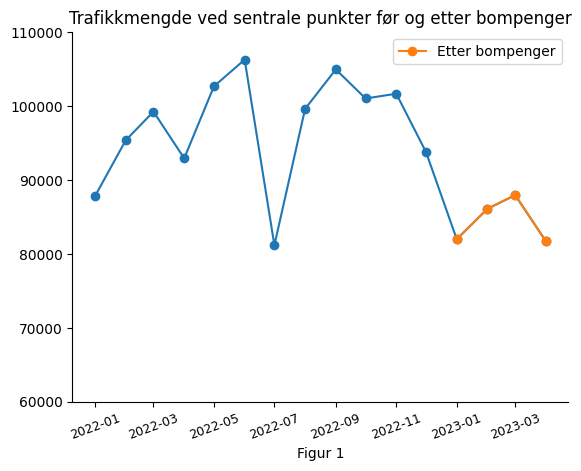

In [166]:
månedstrafikksum = månedstrafikk.groupby(['Dato'])['Trafikkmengde'].sum()
månedstrafikksum = månedstrafikksum.to_frame()
månedstrafikksum = månedstrafikksum.reset_index()
månedstrafikk2023 = månedstrafikksum[månedstrafikksum['Dato'] >= '2023-01-01']

fig, ax = plt.subplots()

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('Figur 1')
ax.set_ylim(60000,110000)
ax.set_title('Trafikkmengde ved sentrale punkter før og etter bompenger');

ax.plot(månedstrafikksum['Dato'],månedstrafikksum['Trafikkmengde'], marker = 'o')
ax.plot(månedstrafikk2023['Dato'],månedstrafikk2023['Trafikkmengde'], marker = 'o', label = 'Etter bompenger')

ax.xaxis.set_tick_params(labelsize=9, rotation = 20) 
ax.legend(loc= 'best');

Figur 1 viser trafikkmengde ved seks sentrale punkter før og etter bompenger. 

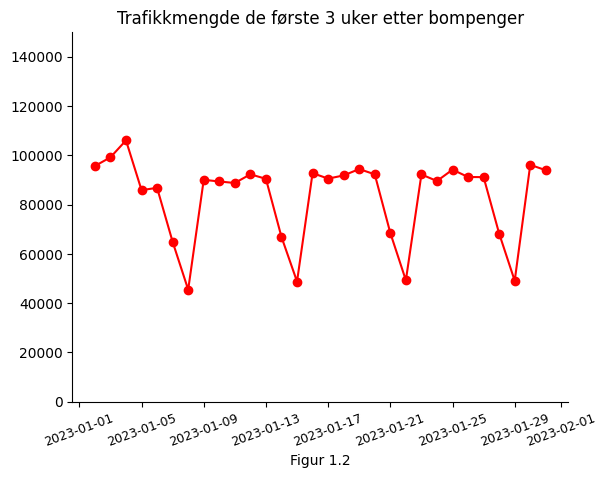

In [234]:
døgntrafikk = pd.read_csv('https://raw.githubusercontent.com/loopdiggaz/SOK1006/main/Mappe2/d%C3%B8gntrafikk.csv', sep=';')
døgntrafikk = døgntrafikk.loc[(døgntrafikk.Felt == 'Totalt'), ['Dato','Trafikkmengde','Navn']] 
døgntrafikksum = døgntrafikk.groupby(['Dato'])['Trafikkmengde'].sum() 
døgntrafikksum = døgntrafikksum.to_frame()
døgntrafikksum = døgntrafikksum.reset_index()

døgntrafikksum['Dato'] = pd.to_datetime(døgntrafikksum['Dato'], dayfirst= True)
døgntrafikksum2 = døgntrafikksum[(døgntrafikksum['Dato'] > '2023-01-01') & (døgntrafikksum['Dato'] < '2023-02-01')]

fig, ax = plt.subplots()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.set_xlabel('Figur 1.2')
ax.set_ylim(0,150000)
ax.plot(døgntrafikksum2['Dato'],døgntrafikksum2['Trafikkmengde'], marker = 'o', color = 'red')
ax.xaxis.set_tick_params(labelsize=9, rotation = 20)
ax.set_title('Trafikkmengde de første 3 uker etter bompenger');

Figur 1.2 viser trafikkmengden per dag i 3 uker etter innføringen av bompenger.

In [318]:
df_buss = pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/main/data/antall%20p%C3%A5stigende.csv", parse_dates=['date'], dayfirst=True)

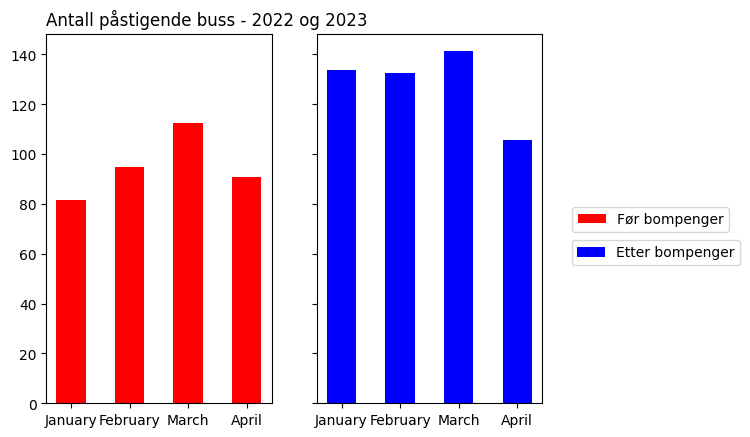

In [378]:
df_buss = pd.read_csv("https://raw.githubusercontent.com/uit-sok-1006-v23/uit-sok-1006-v23.github.io/main/data/antall%20p%C3%A5stigende.csv", parse_dates=['date'], dayfirst=True)

df_buss2022 = df_buss[(df_buss['date'] >= '2022-01-01') & (df_buss['date'] <= '2022-04-30')]
df_buss2022 = df_buss2022.groupby(['date'])['Påstigende'].sum() 
df_buss2022 = df_buss2022.to_frame()
df_buss2022 = df_buss2022.reset_index()

df_måned = df_buss2022.groupby(df_buss2022['date'].dt.strftime('%B'))['Påstigende'].sum()
df_måned = df_måned.to_frame()
df_måned = df_måned.reset_index()
df_måned['Påstigende'] = df_måned['Påstigende'].div(10000)
months = ["January","February","March","April"]
df_måned['date'] = pd.Categorical(df_måned['date'], categories= months, ordered=True)
df_måned.sort_values(by='date', inplace=True)

# Etter bompenger
df_buss2 = df_buss[(df_buss['date'] >= '2023-01-01') & (df_buss['date'] <= '2023-04-30')]
df_måned2 = df_buss2.groupby(df_buss2['date'].dt.strftime('%B'))['Påstigende'].sum()
df_måned2 = df_måned2.to_frame()
df_måned2 = df_måned2.reset_index()
df_måned2['Påstigende'] = df_måned2['Påstigende'].div(10000)
months2 = ["January", "February", "March", "April"]
df_måned2['date'] = pd.Categorical(df_måned2['date'], categories= months2, ordered=True)
df_måned2.sort_values(by='date', inplace=True)

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
ax1.bar(df_måned['date'],df_måned["Påstigende"], width = 0.5 ,color = 'red',label = 'Før bompenger')
ax2.bar(df_måned2['date'],df_måned2["Påstigende"], width = 0.5 , color='blue',label = 'Etter bompenger')
ax1.set_title('Antall påstigende buss - 2022 og 2023', loc = 'left')
ax1.legend(bbox_to_anchor=(3.06,0.55))
ax2.legend(bbox_to_anchor=(1.1,0.46));

Figur 1.3 viser antall påstigende med buss før og etter bompenger. Her er verdiene delt på 10 000 slik at 80 er 800 000. Vi ser at antall påstigende har økt fra 2022 til 2023. I januar har antallet økt med tilnærmet 64%, noe som er en markant økning. 

### Kapittel 3. Bilisters tilpasning til bompenger. 

Modellen som brukes i analysen er en forenkling av virkeligheten. Modellen bygger på noen forutsetninger: 
- Konsumenten velger mellom to goder som kan måles i noe entydig, som i dette tilfellet er kroner. 
- Nytten fra konsum er kun avhengig av eget konsum. 
- Prisene tas for gitt og konsumenten har full oversikt over egenskapene til godene. 
- Hele inntekten til konsumenten går til konsum, sparing blir således sett bort ifra. 
- Formålet til konsumenten er å makismere sin nytte, ved å konsumere mest mulig. 

Konsumenten kan velge mellom 1. Andre goder og 2. Antall kilometer kjørt. Andre goder er blitt gitt prisen 1 kr, slik at det blir et mål i penger. 

In [396]:
import requests
from pyjstat import pyjstat
postUrl = "https://data.ssb.no/api/v0/no/table/12576/"
apiQuery = { "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "agg_single:FylkerGjeldende",
        "values": [
          "54"
        ]
      }
    },
    {
      "code": "Kjoretoytype",
      "selection": {
        "filter": "item",
        "values": [
          "15"
        ]
      }
    },
    {
      "code": "DrivstoffType",
      "selection": {
        "filter": "item",
        "values": [
          "1",
          "18"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "GjsnittKjorelengde"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2020",
          "2021",
          "2022"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }}
def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds
df_kmkjørt, df_id, ds = apiToDataframe(postUrl, apiQuery)

TØI funnet distanseavhengige kostnader per kilometer som i 2022 var 3,03 kr per kilometer. Analysen vil bruke denne kostnaden per km i modellen. 

I en artikkel fra Nordlys (26.April.2023) får vi ferske tall fra Tenk Tromsø. De opplyser at en gjennomsnittlig billist i Tromsø brukte 366 kr på bompenger i Mars. Vi kan bruke dette til å regne kostnaden per kilometer ved å først dele måndedsbeløpet på antall dager i måneden, og deretter dele på antall km som blir kjørt i snitt per dag. Vi legger tallet sammen med den distanseavhengige kostnaden som i 2022 var på 3,03, og finner at kostnaden pr kilometer for en bilist i Tromsø er på 3,61 kr per kilometer etter innføringen av bompenger. 

For å tegne en budsjettbetingelse trenger vi også en gjennomsnittsinntekt. I følge Statistisk Sentralbyrå (SSB) var gjennomsnittsinntekten i 2022 på 644 680 kroner. Vi kan regene om dette og bruke som et estimat for dagsbudsjett.  

Ved å bruke disse estimatene har jeg i figuren under tegnet en budsjettbetingelse som viser budsjettet til en bilist før og etter bompenger. Det rosa området viser det reduserte mulighetsområdet som følge av de økte kostnands nivået.

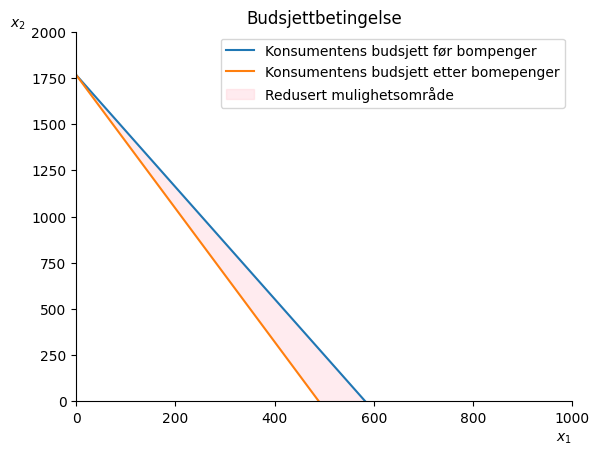

In [397]:

def budsjett(M, p1, p2, x1):
    return M/p2 - p1*x1/p2

x = np.linspace(0.001,1000,1000)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('$x_2$', loc='top', rotation=0)
                ax.set_xlabel('$x_1$', loc='right')
                ax.set_xlim(0,1000)
                ax.set_ylim(0,2000)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

ax.plot(x, budsjett(1766, 3.03, 1, x), label = 'Konsumentens budsjett før bompenger')
ax.plot(x, budsjett(1766, 3.61, 1, x), label = 'Konsumentens budsjett etter bomepenger')

ax.fill_between(x, budsjett(1766, 3.03, 1, x), budsjett(1766, 3.61, 1, x), color = "pink",alpha = 0.3,label='Redusert mulighetsområde')

ax.set_title('Budsjettbetingelse')
ax.legend(loc = 'best');


Her ser vi at endringen i pris på gode 1 (pris per km) ikke endrer konsumet av gode 2 (andre goder). Godene er uavhengige i konsum. Dette er spesielt for Cobb Douglas funksjoner, ettersom det ikke er noen krysspriselastisitet. 

In [398]:
# symboler

x_1, x_2, a, b, U_0 =sp.symbols("x_1 x_2 a b U_0", real=True, positive=True)
U=x_1**a*x_2**b
U

# vi må løse for x_2 og et gitt nyttenivå
x_2_ind_sol=sp.solve(U-U_0,x_2)[0]
x_2_ind_sol

# gjør om for å plotte

indiff_x_2=sp.lambdify( (U_0,a,b,x_1), x_2_ind_sol)
indiff_x_2(U_0,a,b,x_1)

# nye symboler
p_1, p_2, m =sp.symbols("p_1 p_2 m", real=True, positive=True)

# budsjett
bud=p_1*x_1+p_2*x_2

# Beregne MSB

msb = sp.diff(U, x_1)/sp.diff(U,x_2)
display(msb)

# Løs likning (14)

x_2_rel=sp.solve(msb-p_1/p_2,x_2)[0]

# sett inn i m og løs for x_1

budsj=bud.subs(x_2,x_2_rel)
x_1_eq= sp.solve(budsj-m,x_1)[0]

# dette er likevektsløsning for x_1
#sett inn i x_2_rel for å få x_2_eq

x_2_eq= x_2_rel.subs(x_1,x_1_eq)

# steg 1 har vi løst x_1_eq og x_2_eq

# steg 2
U_max=U.subs([(x_1,x_1_eq),(x_2,x_2_eq)])

# Vi kan bruke tall i et oppslag for å regne numeriske verdier
# her er et eksempel
# la oss lage noen tall i et oppslag
in_dict = {"a":0.05,"b":0.95,"m":1766,"p_1":3.61,"p_2":1}

# Vi bruker disse tallene til å finne nytten som oppnås samt etterspørsel

nytte=sp.sympify(U_max).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})
x_1_num=sp.sympify(x_1_eq).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})
x_2_num=sp.sympify(x_2_eq).evalf(subs={a:in_dict['a'], b:in_dict['b'], m:in_dict['m'], p_1:in_dict['p_1'], p_2:in_dict['p_2']})

# steg 3 
# vi har laget x_2_ind_sol som løsning
# og vi har laget en funksjon ved lambdify: indiff_x_2(U_0,a,b,x_1)

# Ta a=.4, b=.25, m=2000, p_1=25, p_2=40

# finn verdien for U_max, x_1_eq og x_2_eq

nytte = U_max.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.61),(p_2,1)])
x_1_num = x_1_eq.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.61),(p_2,1)])
x_2_num = x_2_eq.subs([(a,0.05),(b,0.95),(m,1766),(p_1,3.61),(p_2,1)])

display(nytte)
display(x_1_num)
display(x_2_num)

a*x_2/(b*x_1)

1358.00467299760

24.4598337950139

1677.70000000000

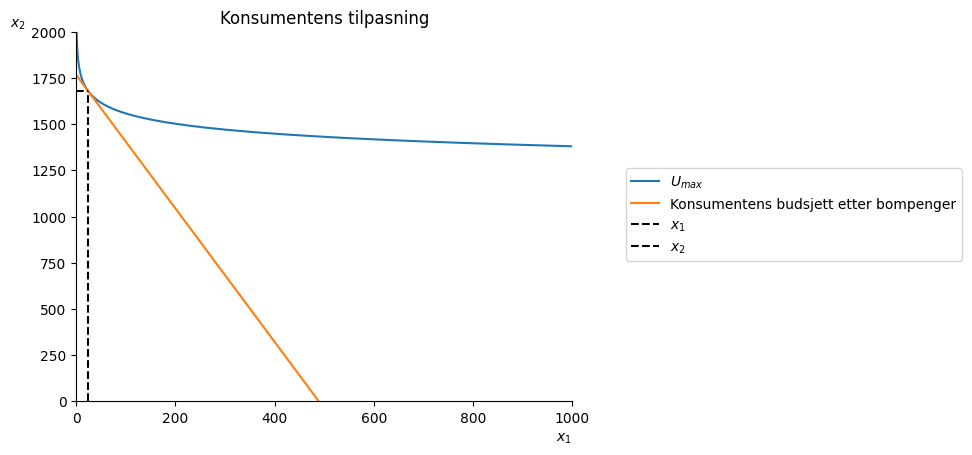

In [391]:
# nå kan vi plotte

fig, ax = plt.subplots()
ax.set_ylabel('$x_2$', loc='top', rotation=0)
ax.set_xlabel('$x_1$', loc='right')
ax.set_xlim(0,1000)
ax.set_ylim(0,2000)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# plott funksjonene

ax.plot(x, indiff_x_2(nytte,.05,0.95,x), label='$U_{max}$')
ax.plot(x, budsjett(1766, 3.61, 1, x), label = 'Konsumentens budsjett etter bompenger')

#ax.plot(x, indiff_x_2(nytte,.05,.95,x), label='$U_{max}$')
#ax.plot(x, budsjett(1766, 3.02, 1, x), label = 'Konsumentens budsjett før bompenger')

# tegn inn tilpasningen

ax.vlines(x_1_num,0,x_2_num, color='black',ls='dashed', label='$x_1$')
ax.hlines(x_2_num,0,x_1_num, color='black',ls='dashed', label='$x_2$')
# tittel
ax.set_title('Konsumentens tilpasning')

#vis navnene:
ax.legend(bbox_to_anchor=(1.8,0.65));


I figuren ser vi at konsumenten har mye av andre goder og lite av antall km kjørt. Det er tatt høyde for at konsumeten foretrekker andre goder, fremfor antall km kjørt, noe som har som hensikt å gjenspeile virkeligheten. Formen på indiferenskurven forteller oss at konsumenten ikke er villig til å ofre mye av andre goder for å oppnå mer av i antall km kjøring. 

Elastisiteten til etterspørselen etter km kjøring er på kort sikt særlig avhengig av subsitusjonsmuligheter i markedet. Altså hvor lett er det å bytte ut personbiltransport med andre midler for transport, feks kollektiv transport. Det er også avhengig av hvor stor andel av budsjettet som blir brukt på konsum av godet - jo større andel av budsjettet jo mer elastisk. 

Vi kan regne MSB i punkten for optimal tilpasning og finner at i konsumenten vil være villig til å bytte ut tilnærmet 3 av andre goder for å få 1 km mer av km kjørt. 

Ifølge SSB var gjennomsnittlig kjørelengde for en personbil med fossilt brennstoff 7476 km i 2022. Vi kan sette opp ulike scenarioer: Vi antar først at en gjennomsnittlig billist har 3 bompasseringer per dag, 2 ganger i rushtrafikk, og 1 gang utenom rush. Dersom vi legger sammen taksten per passering en bilist måtte betale 69.6 kroner i snitt hver dag med AUTO-pass avtale. Vi kan bruke dette til å regne prisen per km ved å dele på antall kilometer som blir kjørt i snitt, dette blir 0,29 kr per kilometer. 